# BYOL Model

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install byol-pytorch torchvision matplotlib scikit-learn

In [ ]:
# Define the source directory for downloaded zip files
source_dir="data"  # Root directory where datasets are stored
destination_dir="crops_for_byol"  # Destination directory to store the crops

# Step 0: Delete all existing files in the source directory using shell command
!rm -rf {source_dir}/*

# Step 1: Download the datasets using unique output file names
!wget -O d2.zip "https://baylor.box.com/shared/static/0ru8p4teqgsicgtv0b1sqek43xb4wq9u.zip"  # yolo8_cs_24_07_16
!wget -O d6.zip "https://baylor.box.com/shared/static/qrcooh1610bagtaf9brqilaxuyg06yxa.zip"  # yolo8_hw_24_07_16
!wget -O d7.zip "https://baylor.box.com/shared/static/2sr9ceoiy2ap8rzi1njhaejqwdulehwe.zip"  # yolo8_sr_24_07_16
!wget -O d8.zip "https://baylor.box.com/shared/static/92a5dm6d1pcb8hrrusljf15m9tvp7nur.zip"  # yolo8_tf_24_07_16



--2025-04-30 15:00:25--  https://baylor.box.com/shared/static/0ru8p4teqgsicgtv0b1sqek43xb4wq9u.zip
Resolving baylor.box.com (baylor.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to baylor.box.com (baylor.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/0ru8p4teqgsicgtv0b1sqek43xb4wq9u.zip [following]
--2025-04-30 15:00:26--  https://baylor.box.com/public/static/0ru8p4teqgsicgtv0b1sqek43xb4wq9u.zip
Reusing existing connection to baylor.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://baylor.app.box.com/public/static/0ru8p4teqgsicgtv0b1sqek43xb4wq9u.zip [following]
--2025-04-30 15:00:26--  https://baylor.app.box.com/public/static/0ru8p4teqgsicgtv0b1sqek43xb4wq9u.zip
Resolving baylor.app.box.com (baylor.app.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to baylor.app.box.com (baylor.app.box.com)|74.112.186.157|:443... connected.
HTTP request

In [ ]:
import subprocess
import pathlib
import time

# Define the source directory for downloaded zip files
source_dir = "data"  # Root directory where datasets are stored

# List of all downloaded zip files (use the names that you assigned in the wget step)
zip_files = ["d1.zip", "d2.zip", "d3.zip", "d4.zip", "d5.zip", "d6.zip",
             "d7.zip", "d8.zip", "d9.zip", "d10.zip", "d11.zip", "d12.zip"]

# Step 1: Unzip all the downloaded datasets
for zip_file in zip_files:
    unzip_command = ["unzip", "-q", zip_file, "-d", source_dir]
    unzip_process = subprocess.Popen(unzip_command)
    unzip_process.wait()  # Wait for each unzip operation to complete

time.sleep(5)
!rm -f d1.zip d2.zip d3.zip d4.zip d5.zip d6.zip d7.zip d8.zip d9.zip d10.zip d11.zip d12.zip

# Function to recursively find 'seal' directories and get all image paths inside
def get_all_image_paths_and_labels(directory, use_numeric_labels=True):
    image_paths = []
    labels = []
    label_to_class = {}

    base_path = pathlib.Path(directory)
    class_names = []

    # First pass: gather all class names from all 'crops/seal' dirs
    for seal_dir in base_path.glob('**/crops/seal'):
        parts = seal_dir.parts
        if "Unk" in parts:
            print("loop1", parts)
            class_index = parts.index("Unk") + 1
        else:
            class_index = parts.index("seal") - 3

        class_name = parts[class_index]
        class_names.append(class_name)

    class_names = sorted(set(class_names))

    # Map classes to labels
    if use_numeric_labels:
        class_indices = {name: idx for idx, name in enumerate(class_names)}
        label_to_class = {idx: name for name, idx in class_indices.items()}
    else:
        class_indices = {name: name for name in class_names}

    # Second pass: collect image paths and labels
    for seal_dir in base_path.glob('**/crops/seal'):
        parts = seal_dir.parts

        if "Unk" in parts:
            print("loop2", parts)
            class_index = parts.index("Unk") + 1
        else:
            class_index = parts.index("seal") - 3

        class_name = parts[class_index]
        label = class_indices[class_name]

        class_image_paths = list(seal_dir.glob('*.jpg')) + \
                            list(seal_dir.glob('*.jpeg')) + \
                            list(seal_dir.glob('*.JPG')) + \
                            list(seal_dir.glob('*.png'))

        image_paths.extend([str(p) for p in class_image_paths])
        labels.extend([label] * len(class_image_paths))

    return image_paths, labels, label_to_class

# --- Step 3: Use the function ---
image_paths, labels, label_to_class = get_all_image_paths_and_labels(source_dir, use_numeric_labels=True)

# --- Step 4: Print results ---
print(f"Total number of seal images: {len(image_paths)}")
for i, path in enumerate(image_paths[:10]):
    print(f"Image {i+1}: {path} | Label: {labels[i]}")



Total number of seal images: 8152
Image 1: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3571.jpg | Label: 554
Image 2: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3569.jpg | Label: 554
Image 3: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN35682.jpg | Label: 554
Image 4: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3572.jpg | Label: 554
Image 5: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3576.jpg | Label: 554
Image 6: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3568.jpg | Label: 554
Image 7: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3570.jpg | Label: 554
Image 8: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN35692.jpg | Label: 554
Image 9: data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN35762.jpg | Label: 554


In [ ]:
# View the labels and label_to_class

print(f"Labels: {labels[:10]}") # Print first 10 labels
print(len(labels))
print(f"Label to Class mapping: {label_to_class}")

Labels: [554, 554, 554, 554, 554, 554, 554, 554, 554, 554]
8152
Label to Class mapping: {0: '000 RedWhite', 1: '003 RedWhite', 2: '100 Orange', 3: '101 Orange', 4: '102 Orange', 5: '103 Orange', 6: '104 Orange', 7: '105595_Fem', 8: '106 Orange', 9: '107 Orange', 10: '108 Orange', 11: '11 Orange', 12: '110 Orange', 13: '111 Orange', 14: '112 Orange', 15: '113 Orange', 16: '114 Orange', 17: '115 Orange', 18: '117 Orange', 19: '118 Orange', 20: '119 Orange', 21: '12 Orange', 22: '120 Orange', 23: '121 Orange', 24: '122 Orange', 25: '123 Orange', 26: '124 Orange', 27: '125 Orange', 28: '126 Orange', 29: '127 Orange', 30: '128 Orange', 31: '129 Orange', 32: '13 Orange', 33: '130 Orange', 34: '131 Orange', 35: '132 Orange', 36: '133 Orange', 37: '134 Orange', 38: '136 Orange', 39: '137 Orange', 40: '139 Orange', 41: '146 Orange', 42: '147 Orange', 43: '148 Orange', 44: '149 Orange', 45: '150 Orange', 46: '151 Orange', 47: '152 Orange', 48: '153 Orange', 49: '154 Orange', 50: '155 Orange', 51

In [ ]:
# Step 5: Apply SAM to segment and replace each image
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python-headless

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-7rlynyh1
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-7rlynyh1
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [ ]:
import os
import requests

# Path to the SAM checkpoint
sam_checkpoint_path = "sam_vit_b_01ec64.pth"

# Download if not already present
if not os.path.exists(sam_checkpoint_path):
    print("Downloading SAM checkpoint...")
    url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth"
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(sam_checkpoint_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download complete.")
    else:
        raise RuntimeError(f"Failed to download SAM checkpoint: HTTP {response.status_code}")
else:
    print("SAM checkpoint already exists.")


SAM checkpoint already exists.


In [ ]:
# Step 5: Apply SAM to segment and replace each image
import cv2
import numpy as np
from segment_anything import sam_model_registry, SamPredictor
import torch
from PIL import Image

# Load the SAM model
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")  # Download from Meta's repo
sam.to(device)
predictor = SamPredictor(sam)

# Function to apply SAM and save the new image
def segment_and_replace_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image_rgb)

    # Use the model to predict masks (automated point prompt)
    height, width, _ = image.shape
    input_point = np.array([[width // 2, height // 2]])  # Central point
    input_label = np.array([1])

    masks, _, _ = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=False)
    mask = masks[0]

    # Apply mask
    masked_image = image_rgb.copy()
    masked_image[~mask] = 0  # Set background to black

    # Save the masked image back (overwrite original)
    cv2.imwrite(image_path, cv2.cvtColor(masked_image, cv2.COLOR_RGB2BGR))

# Apply SAM to each image
for i, img_path in enumerate(image_paths):
    try:
        segment_and_replace_image(img_path)
        if i % 100 == 0:
            print(f"Processed {i}/{len(image_paths)} images")
    except Exception as e:
        print(f"Error processing {img_path}: {e}")





Processed 0/8152 images
Processed 100/8152 images
Processed 200/8152 images
Processed 300/8152 images
Processed 400/8152 images
Processed 500/8152 images
Processed 600/8152 images
Processed 700/8152 images
Processed 800/8152 images
Processed 900/8152 images
Processed 1000/8152 images
Processed 1100/8152 images
Processed 1200/8152 images
Processed 1300/8152 images
Processed 1400/8152 images
Processed 1500/8152 images
Processed 1600/8152 images
Processed 1700/8152 images
Processed 1800/8152 images
Processed 1900/8152 images
Processed 2000/8152 images
Processed 2100/8152 images
Processed 2200/8152 images
Processed 2300/8152 images
Processed 2400/8152 images
Processed 2500/8152 images
Processed 2600/8152 images
Processed 2700/8152 images
Processed 2800/8152 images
Processed 2900/8152 images
Processed 3000/8152 images
Processed 3100/8152 images
Processed 3200/8152 images
Processed 3300/8152 images
Processed 3400/8152 images
Processed 3500/8152 images
Processed 3600/8152 images
Processed 370

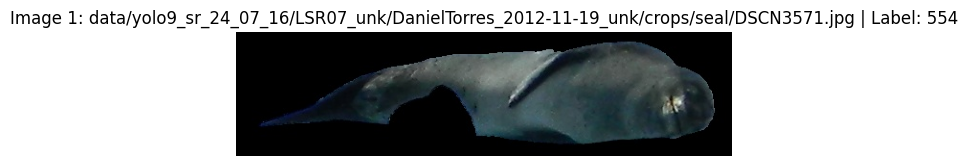

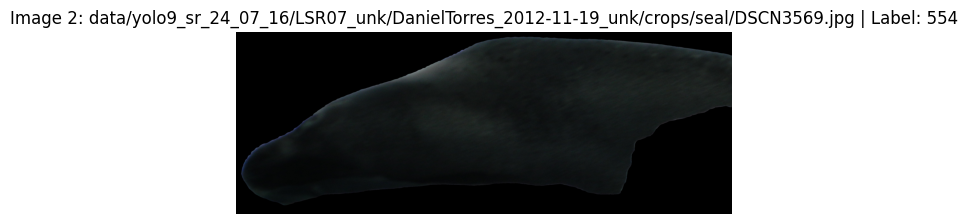

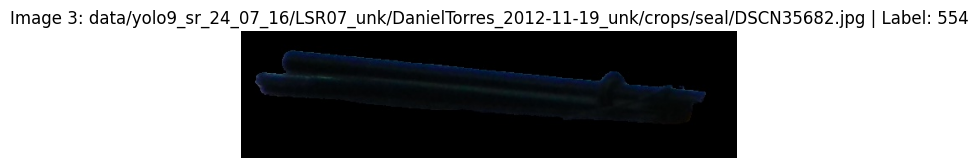

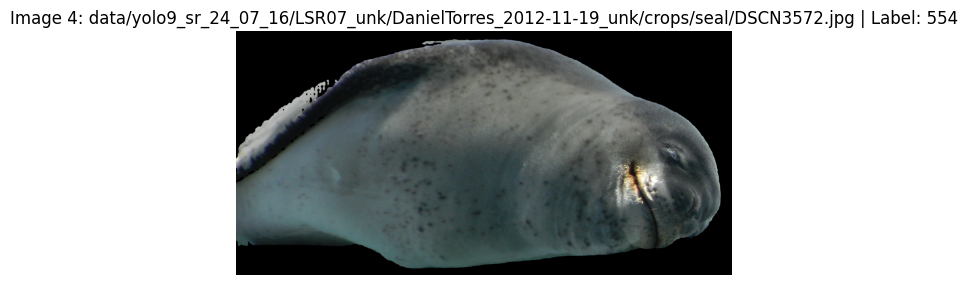

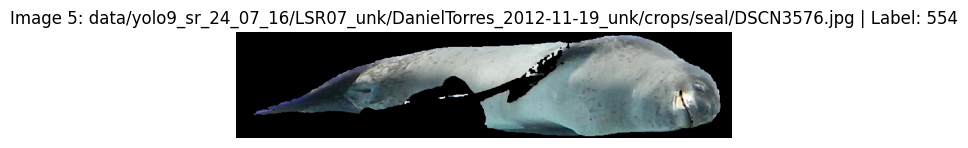

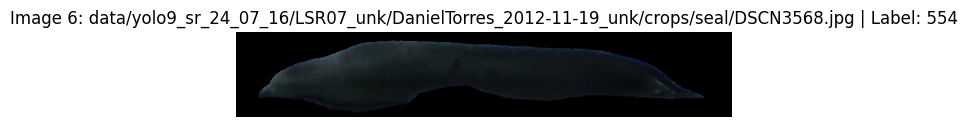

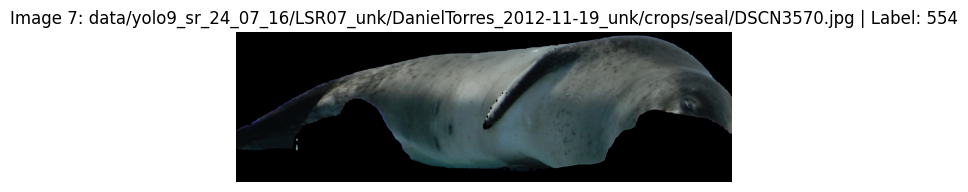

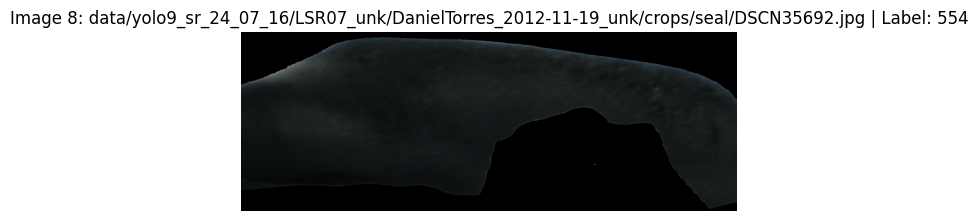

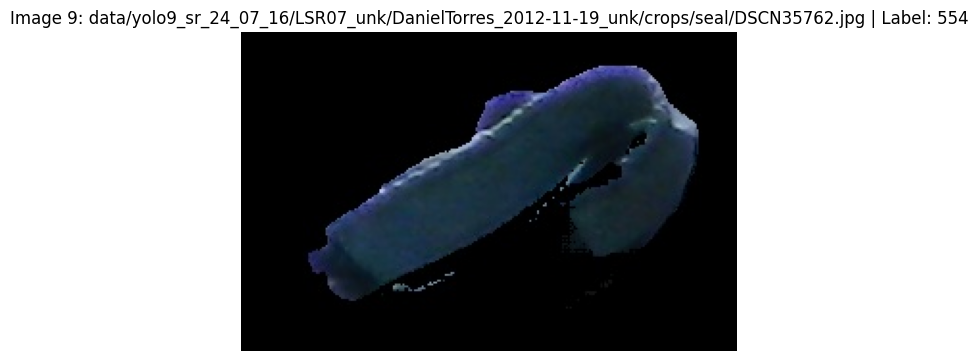

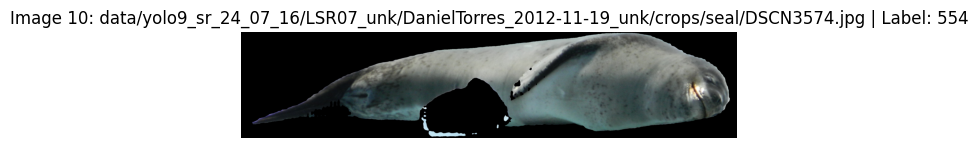

In [ ]:
# prompt: print photos from the dataset

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'image_paths' is defined from the previous code
for i, img_path in enumerate(image_paths[:10]): # Display only the first 10 images
    try:
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f"Image {i+1}: {img_path} | Label: {labels[i]}")
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error displaying {img_path}: {e}")


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def ensure_min_samples_per_class(image_paths, image_labels, min_samples=2, test_size=0.3, random_state=None):
    """
    Ensure all classes in image_labels have at least min_samples samples in the temp split.

    Returns:
        train_image_paths, temp_image_paths, train_labels, temp_labels
    """
    image_paths = np.array(image_paths)
    image_labels = np.array(image_labels)

    while True:
        train_paths, temp_paths, train_labels, temp_labels = train_test_split(
            image_paths, image_labels,
            test_size=test_size,
            stratify=image_labels,
            random_state=random_state
        )

        _, temp_counts = np.unique(temp_labels, return_counts=True)

        if np.all(temp_counts >= min_samples):
            return list(train_paths), list(temp_paths), list(train_labels), list(temp_labels)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Directory containing your images
image_dir = '/content/data/'

# Load image paths and labels
image_paths, image_labels, labels_to_classes = get_all_image_paths_and_labels(image_dir, '_cs_')

# Show examples
for img, lbl in zip(image_paths[:10], image_labels[:10]):
    print(f"Image: {img}, Label: {lbl}")

# Convert to NumPy arrays
image_paths = np.array(image_paths)
image_labels = np.array(image_labels)

# Identify classes with fewer than 8 samples
unique_labels, label_counts = np.unique(image_labels, return_counts=True)
few_sample_classes = unique_labels[label_counts < 8]

# Mask for few and many sample classes
few_sample_mask = np.isin(image_labels, few_sample_classes)
many_sample_mask = ~few_sample_mask

# Step 1: Split only the classes with sufficient samples
train_image_paths, temp_image_paths, train_labels, temp_labels = ensure_min_samples_per_class(
    image_paths[many_sample_mask],
    image_labels[many_sample_mask],
    min_samples=2
)

# Step 2: Split the temp set into validation and test
val_image_paths, test_image_paths, val_labels, test_labels = train_test_split(
    temp_image_paths,
    temp_labels,
    test_size=0.5,
    random_state=42,
    stratify=temp_labels
)

# Step 3: Add the few-sample-class images to the training set
train_image_paths = np.concatenate([train_image_paths, image_paths[few_sample_mask]])
train_labels = np.concatenate([train_labels, image_labels[few_sample_mask]])

# Final split sizes
print(f"Training set size: {len(train_image_paths)}")
print(f"Validation set size: {len(val_image_paths)}")
print(f"Test set size: {len(test_image_paths)}")


Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3571.jpg, Label: 554
Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3569.jpg, Label: 554
Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN35682.jpg, Label: 554
Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3572.jpg, Label: 554
Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3576.jpg, Label: 554
Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3568.jpg, Label: 554
Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN3570.jpg, Label: 554
Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN35692.jpg, Label: 554
Image: /content/data/yolo9_sr_24_07_16/LSR07_unk/DanielTorres_2012-11-19_unk/crops/seal/DSCN35

In [ ]:
print(f"Length of training labels: {len(train_labels)}")
print(f"Length of validation labels: {len(val_labels)}")
print(f"Length of test labels: {len(test_labels)}")


Length of training labels: 6088
Length of validation labels: 1032
Length of test labels: 1032


In [ ]:
# Print some examples to verify
print("=== Train Samples ===")
for img, lbl in zip(train_image_paths[:5], train_labels[:5]):
    print(f"Train Image: {img}, Label: {lbl}")

print("\n=== Validation Samples ===")
for img, lbl in zip(val_image_paths[:5], val_labels[:5]):
    print(f"Validation Image: {img}, Label: {lbl}")

print("\n=== Test Samples ===")
for img, lbl in zip(test_image_paths[:5], test_labels[:5]):
    print(f"Test Image: {img}, Label: {lbl}")


=== Train Samples ===
Train Image: /content/data/yolo8_cs_24_07_16/406 Yellow/unk_2016-02-02_LeopardBeach/crops/seal/DSCN2131.jpg, Label: 86
Train Image: /content/data/yolo8_cs_24_07_16/18 Orange/unk_2016-03-02_Alcazar/crops/seal/IMG_4279.jpg, Label: 63
Train Image: /content/data/yolo8_tf_24_07_16/TF11_Male (serious face pattern neck lips scar left scar close to tail nice leftflipper)/Arredondo_2019-11-09_Parry/crops/seal/DSC_0151.jpg, Label: 568
Train Image: /content/data/yolo8_cs_24_07_16/71 Orange/unk_2017-01-29_CachE (SMW)/crops/seal/01.29.2017.CachE.jpg, Label: 522
Train Image: /content/data/yolo8_cs_24_07_16/4 Orange/unk_2018-12-25_CachE (AFC)/crops/seal/DSC02618.jpg, Label: 83

=== Validation Samples ===
Validation Image: /content/data/yolo9_sr_24_07_16/LSR08_unk/unk_2017-05-09_unk/crops/seal/DSC_0073.jpg, Label: 555
Validation Image: /content/data/yolo9_sr_24_07_16/LSR02_unk/CamilaChamorro_2018-12-01_unk/crops/seal/Camila_ChamorroCelular.jpg, Label: 549
Validation Image: /conte

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import models
from torch.utils.data import DataLoader
from byol_pytorch import BYOL
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
# from torchvision import datasets


In [ ]:
import pathlib
from collections import defaultdict
from sklearn.model_selection import train_test_split
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from joblib import Parallel, delayed
from tqdm import tqdm
import numpy as np

# ====== Constants ======
batch_size = 32
image_size = 224
source_dir = "data"  # Define the source directory where your images are stored

# ====== Image validation ======
def is_valid_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()
        return True
    except Exception:
        print(f"Invalid or corrupt image file: {image_path}")
        return False

def filter_valid_images_and_labels(image_paths, labels):
    results = Parallel(n_jobs=4)(delayed(is_valid_image)(p) for p in tqdm(image_paths, desc="Validating Images"))
    valid_paths = [p for p, valid in zip(image_paths, results) if valid]
    valid_labels = [l for l, valid in zip(labels, results) if valid]
    return valid_paths, valid_labels

# ====== Transforms ======
byol_augment = transforms.Compose([
    transforms.RandomResizedCrop(image_size, scale=(0.2, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.4, 0.4, 0.4, 0.1),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# ====== Dataset Class ======
class SealDataset(Dataset):
    def __init__(self, image_paths, labels=None, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        if self.labels:
            return img, self.labels[idx]
        return img

# ====== Prepare data ======
# Assuming you have already extracted the image_paths and string labels
# Adjust the unpacking to capture the third return value (label_to_class)
seal_image_paths, seal_labels, label_to_class = get_all_image_paths_and_labels(source_dir, use_numeric_labels=True)
seal_image_paths, seal_labels = filter_valid_images_and_labels(seal_image_paths, seal_labels)


# Convert string labels to numeric labels (if needed)
unique_labels = sorted(set(seal_labels))
label_to_class = {label: idx for idx, label in enumerate(unique_labels)}  # You can skip this if you already have numeric labels
seal_labels = [label_to_class[label] for label in seal_labels]  # Convert to numeric labels

# Split data into training and testing sets (if not already done)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    seal_image_paths, seal_labels, test_size=0.2, random_state=42
)

# Split data into train, validation, and test sets (if not already done)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.2, random_state=42
)

# ====== Datasets & Dataloaders ======
train_dataset = SealDataset(train_paths, train_labels, transform=byol_augment)
test_dataset = SealDataset(test_paths, test_labels, transform=byol_augment)
val_dataset = SealDataset(val_paths, val_labels, transform=byol_augment)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# ====== Logging ======
print(f"Training images: {len(train_dataset)}")
print(f"Validation images: {len(val_dataset)}")
print(f"Testing images: {len(test_dataset)}")

# Preview a few examples
for img, lbl in zip(train_paths[:5], train_labels[:5]):
    print(f"Train: {img}, Label: {lbl}")


Validating Images: 100%|██████████| 8152/8152 [00:00<00:00, 10109.57it/s]


Training images: 5216
Validation images: 1305
Testing images: 1631
Train: data/yolo8_cs_24_07_16/4 Orange/unk_2019-01-20_CachE (AFC)/crops/seal/DSC03248.jpg, Label: 83
Train: data/yolo8_cs_24_07_16/147 Orange/unk_2017-12-20_Pinochet (SMW)/crops/seal/P1000675.jpg, Label: 42
Train: data/yolo8_hw_24_07_16/53411_Male/KatDornez_2022-11-27_Antarctica/crops/seal/2022-11-27_Kat_Dornez_918843.jpg, Label: 208
Train: data/yolo9_sr_24_07_16/LSR04_unk/unk_2015-04-05_unk/crops/seal/20150405_130334.jpg, Label: 551
Train: data/yolo9_sr_24_07_16/LSR08_unk/unk_2019-03-30_unk/crops/seal/IMG_18922.jpg, Label: 555


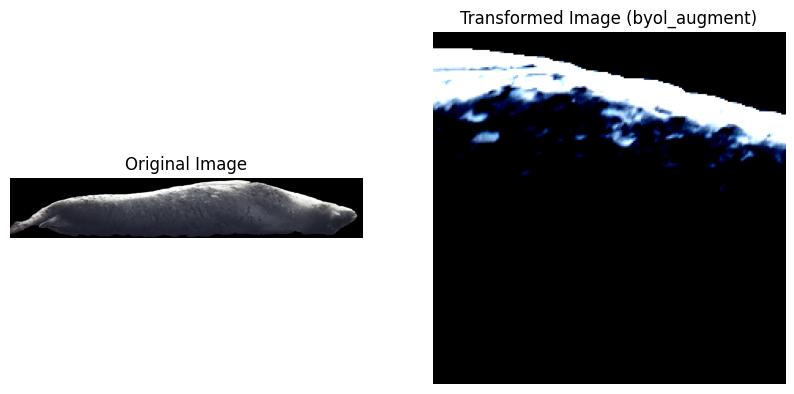

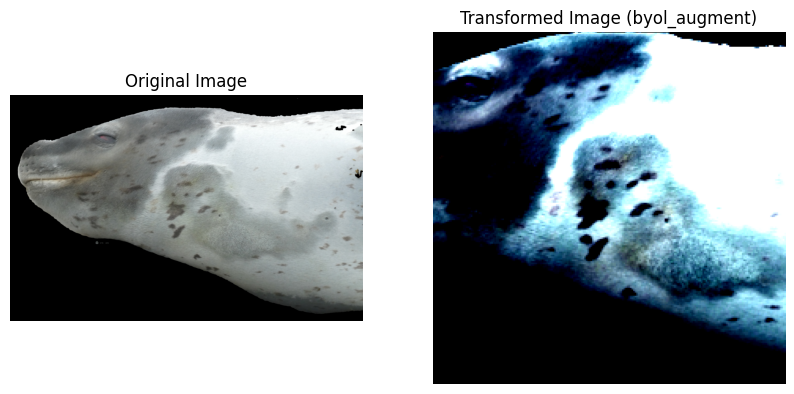

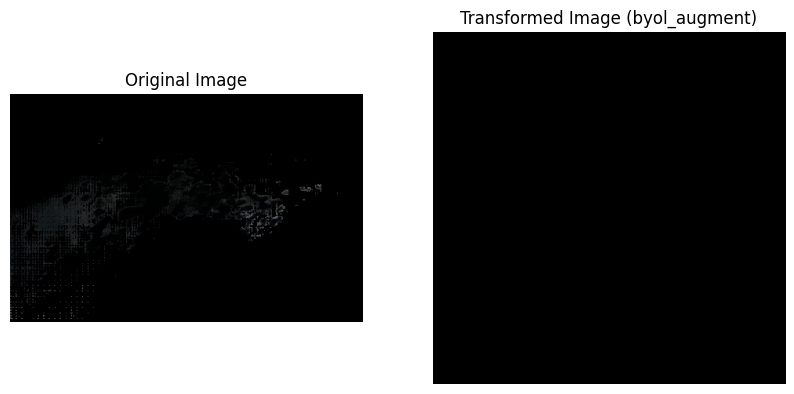

In [ ]:
# prompt: print photo from before and afterbyol_augment print like 3 examples

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'train_paths' and 'byol_augment' are defined from the previous code

# Display 3 examples of images transformed using byol_augment
for i in range(3):
  img_path = train_paths[i]
  try:
    original_image = mpimg.imread(img_path)

    # Apply the transformations
    from PIL import Image
    img = Image.open(img_path).convert("RGB")
    transformed_image = byol_augment(img)
    transformed_image = transformed_image.permute(1, 2, 0).numpy()


    # Display the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(transformed_image)
    axes[1].set_title("Transformed Image (byol_augment)")
    axes[1].axis('off')

    plt.show()

  except Exception as e:
    print(f"Error processing image {img_path}: {e}")


In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision.models as models
from torch import nn

# Set device (CUDA if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained ResNet50 backbone
resnet = models.resnet50(pretrained=True)

# Remove the fully connected layer (fc) and the projection head
resnet.fc = torch.nn.Identity()

# Define a hook function to capture the 2048-dimensional features
features = None
def hook_fn(module, input, output):
    global features
    features = output.view(output.size(0), -1)  # Flatten to (batch_size, 2048)

# Register the hook on the avgpool layer
hook = resnet.avgpool.register_forward_hook(hook_fn)

# Initialize BYOL with the modified ResNet50
learner = BYOL(
    resnet,
    image_size=224,
    hidden_layer="avgpool"  # Ensures we hook into this layer
)

# Move the model to the correct device (CUDA or CPU)
learner.to(device)

# Set the model in training mode
learner.train()




/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 190MB/s]


BYOL(
  (net): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Co

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                          # Initialize the DataLoader for training data
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Set the optimizer (Adam)
optimizer = torch.optim.Adam(learner.parameters(), lr=3e-4)

# Training loop
epochs = 10
for epoch in range(epochs):
    learner.train()
    for images, labels in train_loader:
        images = images.to(device)  # Move images to device

        # Pass the images through BYOL, which handles augmentations internally
        loss = learner(images)

        # Backpropagate and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Update the moving average of the target encoder
    learner.update_moving_average()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Save the trained model
torch.save(learner.state_dict(), 'byol_model.pth')

Epoch [1/10], Loss: 1.3606
Epoch [2/10], Loss: 1.4791
Epoch [3/10], Loss: 1.3773
Epoch [4/10], Loss: 1.4254
Epoch [5/10], Loss: 1.2253
Epoch [6/10], Loss: 1.2394
Epoch [7/10], Loss: 1.1854
Epoch [8/10], Loss: 1.3659
Epoch [9/10], Loss: 1.0865
Epoch [10/10], Loss: 1.0695


In [ ]:
def get_embeddings(data_loader, learner, device):
    learner.eval()  # Set the model to evaluation mode
    embeddings = []
    labels_list = []

    with torch.no_grad():  # Disable gradient calculation
        for images, labels in tqdm(data_loader, desc="Extracting Embeddings"):
            images = images.to(device)  # Move images to device
            labels_list.append(labels)

            # Forward pass to capture the embeddings from the hook
            learner(images)

            # `features` now has 2x images. Keep only the first half.
            batch_size = images.size(0)
            embeddings.append(features.cpu().numpy()[:batch_size, :])

    embeddings = np.concatenate(embeddings, axis=0)
    labels_list = np.concatenate(labels_list, axis=0)
    return embeddings, labels_list



In [ ]:
print(f"Length of training labels: {len(train_labels)}")
print(f"Length of validation labels: {len(val_labels)}")
print(f"Length of test labels: {len(test_labels)}")


Length of training labels: 5216
Length of validation labels: 1305
Length of test labels: 1631


In [ ]:
# Extract embeddings for the training set
train_embeddings, train_labels = get_embeddings(train_loader, learner, device)

# Extract embeddings for the validation set
val_embeddings, val_labels = get_embeddings(val_loader, learner, device)

# Check the shape of the embeddings
print(f"Train embeddings shape: {train_embeddings.shape}")
print(f"Validation embeddings shape: {val_embeddings.shape}")


Extracting Embeddings: 100%|██████████| 41/41 [00:18<00:00,  2.24it/s]

Train embeddings shape: (5216, 2048)
Validation embeddings shape: (1305, 2048)


In [ ]:
# Convert the NumPy arrays to PyTorch tensors
train_embeddings_tensor = torch.tensor(train_embeddings, dtype=torch.float32)
val_embeddings_tensor = torch.tensor(val_embeddings, dtype=torch.float32)

train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

# Print the shapes of the tensors to verify the conversion
print(f"Train embeddings tensor shape: {train_embeddings_tensor.shape}")
print(f"Validation embeddings tensor shape: {val_embeddings_tensor.shape}")
print(f"Train labels tensor shape: {train_labels_tensor.shape}")
print(f"Validation labels tensor shape: {val_labels_tensor.shape}")



Train embeddings tensor shape: torch.Size([5216, 2048])
Validation embeddings tensor shape: torch.Size([1305, 2048])
Train labels tensor shape: torch.Size([5216])
Validation labels tensor shape: torch.Size([1305])


In [ ]:
print("Example values of train_embeddings:")
print(train_embeddings_tensor[:5])  # Print the first 5 examples
print("\nExample values of val_embeddings:")
print(val_embeddings_tensor[:5])  # Print the first 5 examples
print("\nExample values of train_labels:")
print(train_labels_tensor[:5])  # Print the first 5 examples
print("\nExample values of val_labels:")
print(val_labels_tensor[:5])  # Print the first 5 examples


Example values of train_embeddings:
tensor([[8.6681e-02, 1.1564e+00, 6.1823e-01,  ..., 7.7741e-01, 8.9082e-01,
         1.1890e-01],
        [2.9116e-01, 2.6627e-01, 5.1952e-01,  ..., 2.7646e-01, 5.0827e-01,
         1.4873e-01],
        [2.0257e-01, 2.1016e-01, 6.8172e-01,  ..., 2.7385e-01, 1.4798e+00,
         7.1047e-01],
        [3.5626e-01, 6.8477e-01, 8.0335e-01,  ..., 2.4319e-01, 1.1851e+00,
         3.5881e-01],
        [3.9733e-01, 6.1624e-01, 6.1367e-02,  ..., 3.7223e-04, 4.9869e-02,
         4.4793e-02]])

Example values of val_embeddings:
tensor([[0.9330, 0.1708, 0.3280,  ..., 0.0852, 0.2345, 0.5424],
        [0.4440, 0.1839, 1.0125,  ..., 0.0348, 0.7043, 0.6755],
        [0.6475, 0.8743, 0.7985,  ..., 0.2244, 1.3225, 0.4986],
        [0.6873, 0.2989, 0.3969,  ..., 0.1181, 0.2349, 1.1640],
        [1.0943, 0.1728, 0.3435,  ..., 0.0726, 0.2726, 0.5460]])

Example values of train_labels:
tensor([145, 430, 266, 551,  72])

Example values of val_labels:
tensor([ 80, 430, 521,  

In [ ]:
database_embeddings = torch.cat([train_embeddings_tensor, val_embeddings_tensor])
database_labels = torch.cat([train_labels_tensor, val_labels_tensor])


In [ ]:
# Convert NumPy arrays to PyTorch tensors (explicitly using .cpu() to avoid GPU-TensorFlow weirdness)
train_embeddings_tensor = torch.from_numpy(train_embeddings).float().cpu()
val_embeddings_tensor = torch.from_numpy(val_embeddings).float().cpu()

train_labels_tensor = torch.from_numpy(train_labels).long().cpu()
val_labels_tensor = torch.from_numpy(val_labels).long().cpu()

# Concatenate them to form the database
database_embeddings = torch.cat([train_embeddings_tensor, val_embeddings_tensor], dim=0)
database_labels = torch.cat([train_labels_tensor, val_labels_tensor], dim=0)


In [ ]:
print(database_embeddings[:5])
print(database_labels[:5])


tensor([[8.6681e-02, 1.1564e+00, 6.1823e-01,  ..., 7.7741e-01, 8.9082e-01,
         1.1890e-01],
        [2.9116e-01, 2.6627e-01, 5.1952e-01,  ..., 2.7646e-01, 5.0827e-01,
         1.4873e-01],
        [2.0257e-01, 2.1016e-01, 6.8172e-01,  ..., 2.7385e-01, 1.4798e+00,
         7.1047e-01],
        [3.5626e-01, 6.8477e-01, 8.0335e-01,  ..., 2.4319e-01, 1.1851e+00,
         3.5881e-01],
        [3.9733e-01, 6.1624e-01, 6.1367e-02,  ..., 3.7223e-04, 4.9869e-02,
         4.4793e-02]])
tensor([145, 430, 266, 551,  72])


In [ ]:
def find_top_k_matches(query_embedding, database_embeddings, k=10):
    # Compute cosine similarities
    query_embedding = query_embedding.to(database_embeddings.device)  # Ensure query_embedding is on the same device
    similarities = torch.nn.functional.cosine_similarity(query_embedding.unsqueeze(0), database_embeddings)
    top_k_indices = similarities.topk(k=k).indices
    return top_k_indices


In [ ]:
def evaluate_similarity_search(learner, database_embeddings, database_labels, dataloader, k=10):
    correct_top_1 = 0
    correct_top_5 = 0
    correct_top_10 = 0
    total = 0

    all_true_labels = []
    all_pred_labels = []

    database_embeddings = database_embeddings.to(device)  # Ensure database_embeddings is on the same device
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            # Forward pass to capture the embeddings from the hook
            learner(images)
            cls_token_output = features.cpu()

            for i in range(len(labels)):
                query_embedding = cls_token_output[i]
                print(cls_token_output.shape, database_embeddings.shape, query_embedding.shape)

                top_k_indices = find_top_k_matches(query_embedding, database_embeddings, k=k)
                top_k_indices = top_k_indices.cpu()  # Move indices to CPU
                top_k_labels = database_labels[top_k_indices].cpu()  # Ensure labels are on CPU

                all_true_labels.append(labels[i].cpu().item())
                all_pred_labels.append(top_k_labels[0].item())  # Take the top-1 prediction

                if labels[i].cpu() in top_k_labels[:1]:  # Move labels[i] to CPU
                    correct_top_1 += 1
                if labels[i].cpu() in top_k_labels[:5]:  # Move labels[i] to CPU
                    correct_top_5 += 1
                if labels[i].cpu() in top_k_labels[:10]:  # Move labels[i] to CPU
                    correct_top_10 += 1
                total += 1

    top_1_accuracy = correct_top_1 / total
    top_5_accuracy = correct_top_5 / total
    top_10_accuracy = correct_top_10 / total

    # Calculate F1 score
    f1 = f1_score(all_true_labels, all_pred_labels, average='weighted')

    # Calculate Balanced Accuracy
    balanced_acc = balanced_accuracy_score(all_true_labels, all_pred_labels)

    return top_1_accuracy, top_5_accuracy, top_10_accuracy, f1, balanced_acc

In [ ]:
top_1_acc, top_5_acc, top_10_acc, f1, balanced_acc = evaluate_similarity_search(learner, database_embeddings, database_labels, test_loader)
print(f"\nTop-1 Accuracy: {top_1_acc} \nTop-5 Accuracy: {top_5_acc} \nTop-10 Accuracy: {top_10_acc} \nF1 Score: {f1} \nBalanced Accuracy: {balanced_acc}")

torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([2048])
torch.Size([64, 2048]) torch.Size([6521, 2048]) torch.Size([20

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
